In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Differentes constantes 
c=3e8
Ae=3e5
#Ae=2e5
Pe=np.square(Ae)
Ge=1
Gr=1
sigma=1
f=2e7
w=2e-7
lambd=c/f


# Partie 1.1

## Q1 - Q2

In [3]:
d = np.random.uniform(200,400) # Distance aleatoire

t = np.linspace(0,3e-6, 1000) # Tableau echantillons temporels

ts = t[1] # Pas de temps du tableau

In [4]:
print("Distance reelle = ", d, "m")

Distance reelle =  234.8467511047624 m


## Q3

In [5]:
def get_delta_t(dist):
	return (2*dist)/c


## Q4

In [6]:

def get_distance_from_time(time):
	return c*(time/2)
	


## Q5

In [7]:
def get_amplitude(dist):
	return np.sqrt((Pe*Ge*Gr*np.square(lambd)*sigma)/(np.power(4*np.pi,3)*np.power(dist,4)))
	


## Q6

In [8]:
def get_template(A):
	time_template = np.arange(0,w,ts)
	template = A*np.sin(2*np.pi*f*time_template)
	return template



## Q7

In [9]:

def get_received_pulse():
	received = np.zeros(1000)
	received_amp=get_amplitude(d)
	tr=get_delta_t(d)
	temp=get_template(received_amp)
	#tab_bool=(t>=tr)&(t<=tr+w) #tableau de bool de la taille de t vec True quand la condition est satisfaite
	#print(t,tr+w)
	#received[tab_bool]=get_template(received_amp) #on injecte le template quand 
	index_min=np.argmin(np.abs(t-tr))
	received[index_min:index_min+temp.size]=temp
	#plt.plot(received)
	#plt.show()
	return received
	#print(received)
	
def model_signal():
	return get_template(1)

def correlation(ref_signal, data):
	Ng = ref_signal.size
	#tab_scal = []
	tau = [np.dot(ref_signal,data[i:i+Ng]) for i in range(1000-Ng)] # Tableau filtre
	index_sig = np.argmax(tau) # Indice du debut du signal
	noise_std = np.std(tau[:442]) # Je ne peux que avoir du bruit avant l'index 442 du tableau de temps (temps pour parcourir 200m aller-retour)
	#print("noise_std = ", noise_std)
	tab_SNR = tau / noise_std
	distance_signal = get_distance_from_time(t[index_sig])
	if(tab_SNR[index_sig] > 3):
		print("Signal found for distance = ", distance_signal, "m")
	else:
		print("No signal found")
	
 
	plt.figure()
	plt.plot(tab_SNR)
	plt.xlabel("time")
	plt.ylabel("Amp")
	plt.show()

## Q8

In [10]:
sig = get_received_pulse()

## Q9

In [11]:
noise = np.random.normal(0,1,1000)
data = noise + sig



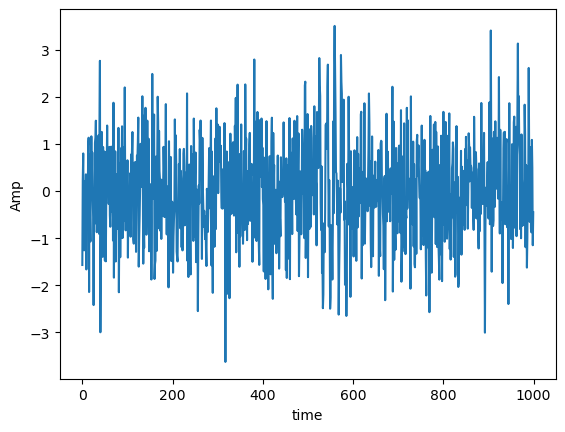

In [12]:
plt.figure()
plt.plot(data)
plt.xlabel("time")
plt.ylabel("Amp")
plt.show()

ref_signal=model_signal()

Signal found for distance =  234.68468468468467 m


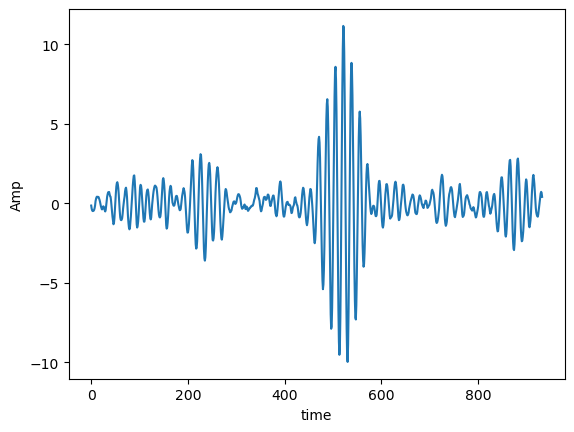

In [13]:
correlation(ref_signal, data)

# Partie 1.2

## Q1-3

In [14]:
td = np.linspace(0,10, 1000)

ts2 = np.linspace(0,1, 100)

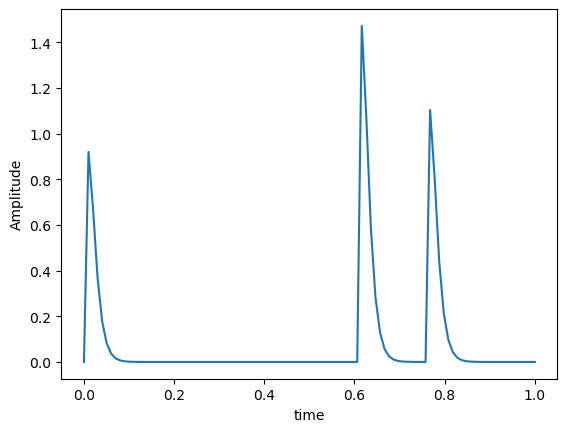

In [15]:
def pulse(A, tau, t):
    return A * t * np.exp(-t*tau)

tau = 100

Tpulse = np.zeros(100)

Tpulse = pulse(250, tau, ts2) 
Tpulse[60:] += pulse(400, tau, ts2[:40]) 
Tpulse[75:] += pulse(300, tau, ts2[:25]) 
plt.figure()
# plt.plot(ts2, pulse(2, 5, ts2))
# plt.plot(ts2[60] + np.array(ts2), pulse(2, 5, ts2[:]))
# plt.plot(ts2[75] + np.array(ts2), pulse(2, 5, ts2[:]))

plt.plot(ts2, Tpulse)
plt.xlabel("time")
plt.ylabel("Amplitude")
plt.show()

## Q4

In [16]:
pas_s = ts2[1]
pas_d = td[1]

print("Pas: ", pas_s)

Pas:  0.010101010101010102


## Q5

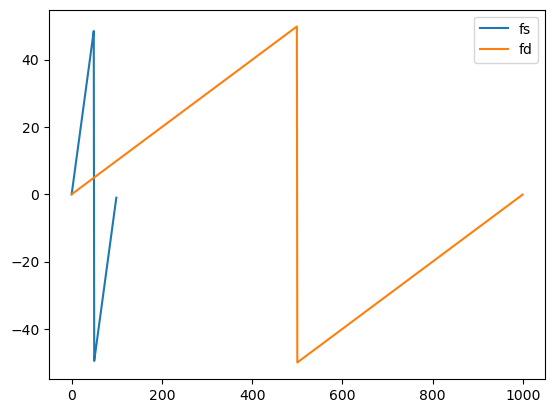

In [17]:
fd = np.fft.fftfreq(1000, d = pas_d)
fs = np.fft.fftfreq(100, d = pas_s)

plt.figure()
plt.plot(fs, label = "fs")
plt.plot(fd, label = "fd")
plt.legend()
plt.show()

## Q6

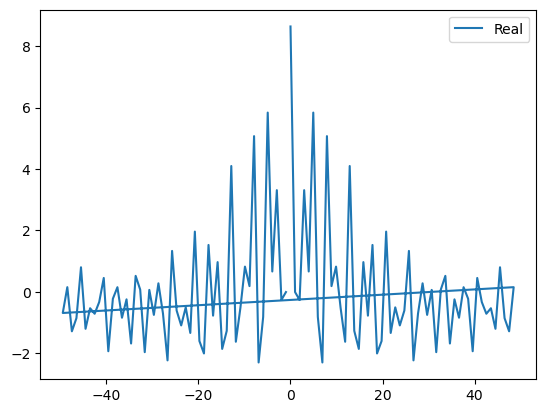

In [18]:
TF_Tpulse = np.fft.fft(Tpulse)

plt.figure()
plt.plot(fs, TF_Tpulse.real, label = "Real")
# plt.plot(fs, TF_Tpulse.imag, label = "Imag")
plt.legend()
plt.show()

In [19]:
def PSD(fd, gamma = -1.2):
    return (fd[1:int(len(fd)/2)]/10)**gamma + 1

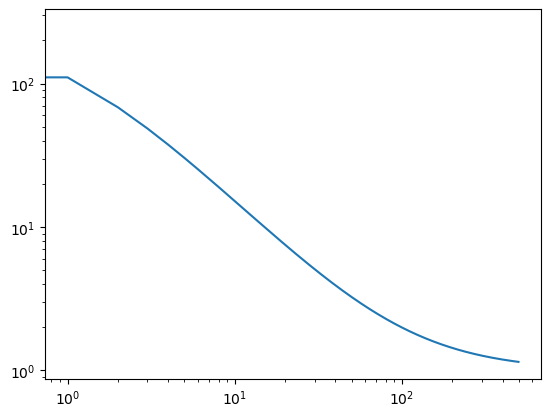

In [20]:
TPSD = PSD(fd)
plt.figure()
plt.plot(TPSD)
plt.xscale("log")
plt.yscale("log")
plt.show()


(500,)
(500,)
(1000,)


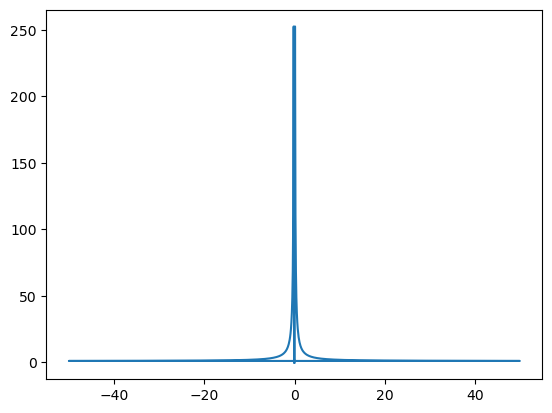

In [21]:

TPSD_bis = np.insert(TPSD, 0, 0)

TPSD_mirror = TPSD_bis[::-1]

TPSD_conca = np.concatenate((TPSD_bis , TPSD_mirror))

print (np.shape(TPSD_bis))
print (np.shape(TPSD_mirror))
print (np.shape(TPSD_conca))

plt.figure()
plt.plot(fd, TPSD_conca)
# plt.xscale("log")
# plt.yscale("log")
plt.show()

In [22]:
def generate_gaussian_data(n, a, b):
    return np.random.normal(loc=a, scale=b, size=n)

def generate_col_noise(TPSD):
    bbg = generate_gaussian_data(1000, 0, 1)
    TF_bbg = np.fft.fft(bbg) 
    TF_bbg_bis = TF_bbg * np.sqrt(TPSD)
    TF_inv_bbg = np.fft.ifft(TF_bbg_bis)
    
    return TF_inv_bbg.real

In [24]:
import random

r_time = random.randint(0, 900)

pulse_signal = np.zeros(1000)
pulse_signal[r_time:r_time+100] += Tpulse

col_noise = generate_col_noise(TPSD_conca)
signal = col_noise + pulse_signal

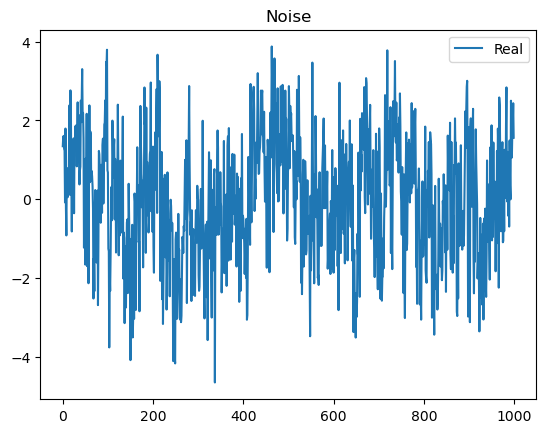

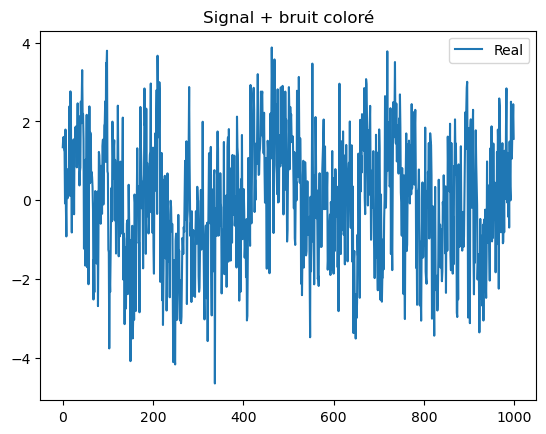

In [25]:
plt.figure()
plt.plot(col_noise, label = "Real")
# plt.plot(TF_inv_bbg.imag, label = "Imag")
plt.legend()
plt.title("Noise")
plt.show()

plt.figure()
plt.plot(signal, label = "Real")

plt.legend()
plt.title ("Signal + bruit coloré")
plt.show()

In [27]:
from numpy.linalg import inv

Cov = 0

nb_real = 1000
for i in range (nb_real):
    col_noise = generate_col_noise(TPSD_conca)
    Cov += np.outer(col_noise.T, col_noise)
    
Cov = Cov/nb_real
print(Cov)

Inv_Cov = inv(Cov)

print(np.shape(Inv_Cov))



[[2.73620108 1.55322272 1.48209032 ... 1.32489649 1.44358332 1.5781866 ]
 [1.55322272 2.98953844 1.64996174 ... 1.26292795 1.40268404 1.55625916]
 [1.48209032 1.64996174 2.8333999  ... 1.30860085 1.40860375 1.52882806]
 ...
 [1.32489649 1.26292795 1.30860085 ... 3.08014054 1.71760984 1.62343888]
 [1.44358332 1.40268404 1.40860375 ... 1.71760984 3.0623704  1.72906962]
 [1.5781866  1.55625916 1.52882806 ... 1.62343888 1.72906962 2.95629764]]
(1000, 1000)
